In [13]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
# import multiprocessing # plotting with multiprocessing doesn't work correctly in notebooks

from mpl_toolkits.basemap import Basemap

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import *
from BB_wx_calcs.wind import wind_uv_to_spd
from BB_data.grid_manager import pluck_point_new
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict
from BB_basemap.draw_maps import draw_CONUS_HRRR_map
from BB_wx_calcs.wind import *

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [9]:
DATE = datetime(2018, 3, 27)
var = 'UVGRD:10 m'

variable = var.replace(':', '_').replace(' ', '_')

In [10]:
m = draw_CONUS_HRRR_map()

In [11]:
P = 90

# Get OSG Percentiles
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)
FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % ((variable, DATE.month, DATE.day, DATE.hour))
with h5py.File(DIR+FILE, 'r') as f:
    OSG = f["p%02d" % P][:]

# Convert Units
if var == 'TMP:2 m' or var == 'DPT:2 m':
    OSG -= 273.15

In [15]:
# Get HRRR values
if var.split(":")[0] == 'UVGRD':
    level = var.split(':')[1]
    Hu = get_hrrr_variable(DATE, 'UGRD:'+level)    
    Hv = get_hrrr_variable(DATE, 'VGRD:'+level)    
    H = Hu.copy()
    H['value'] = wind_uv_to_spd(Hu['value'], Hv['value'])

else:
    H = get_hrrr_variable(DATE, var)
    # Convert Units
    if var == 'TMP:2 m' or var == 'DPT:2 m':
        H['value'] -= 273.15

./temp_2018032700_f00_UGR.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 59:42916358:d=2018032700:UGRD:10 m above ground:anl:

range: 42916358 44083018
./temp_2018032700_f00_VGR.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 60:44083019:d=2018032700:VGRD:10 m above ground:anl:

range: 44083019 45236759


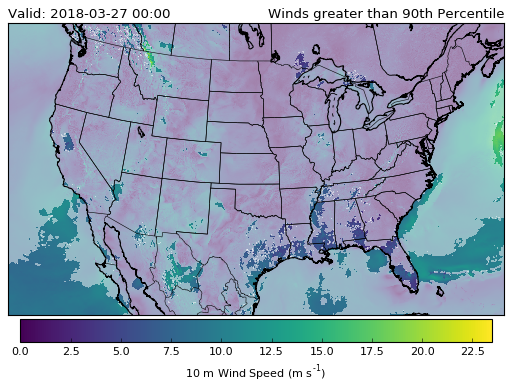

In [91]:
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.pcolormesh(H['lon'], H['lat'], H['value'],
             latlon=True,
             vmin=0,
             cmap='viridis')
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=.95)

m.contourf(H['lon'], H['lat'], H['value']>OSG,
           levels=[-.1,.1],
           colors='white',
           alpha=.5,
           latlon=True)



cb.set_label(r'10 m Wind Speed (m s$\mathregular{^{-1}}$)')

plt.title('Winds greater than %02dth Percentile' % (P), loc='right')
plt.title('Valid: %s' % DATE.strftime('%Y-%m-%d %H:%M'), loc='left')

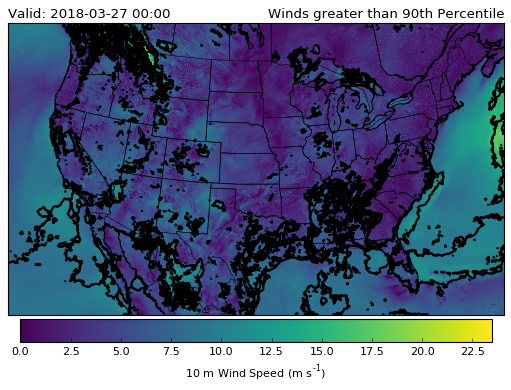

In [86]:
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.pcolormesh(H['lon'], H['lat'], H['value'],
             latlon=True,
             vmin=0,
             cmap='viridis')
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=.95)

m.contour(H['lon'], H['lat'], H['value']>OSG,
           levels=[0],
           colors='k',
           latlon=True)



cb.set_label(r'10 m Wind Speed (m s$\mathregular{^{-1}}$)')

plt.title('Winds greater than %02dth Percentile' % (P), loc='right')
plt.title('Valid: %s' % DATE.strftime('%Y-%m-%d %H:%M'), loc='left')

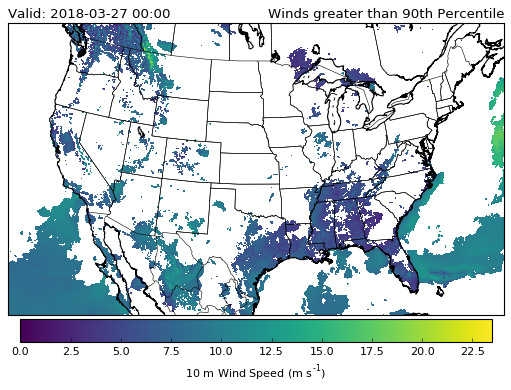

In [90]:
gt_P = H['value']
gt_P = np.ma.array(gt_P)
gt_P[gt_P < OSG] = np.ma.masked

m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.pcolormesh(H['lon'], H['lat'], gt_P,
             latlon=True,
             vmin=0,
             cmap='viridis')
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=.95)

cb.set_label(r'10 m Wind Speed (m s$\mathregular{^{-1}}$)')

plt.title('Winds greater than %02dth Percentile' % (P), loc='right')
plt.title('Valid: %s' % DATE.strftime('%Y-%m-%d %H:%M'), loc='left')